In [91]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [95]:
data="HousingData.csv"
data= pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
target = data[10]

In [96]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [97]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [98]:
data.shape

(1012, 11)

In [99]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

In [100]:
data.nunique()

0     861
1     480
2     304
3       2
4      81
5     446
6     356
7     412
8       9
9      66
10     46
dtype: int64

In [101]:
data.isnull().sum()

0       0
1       0
2       0
3     506
4     506
5     506
6     506
7     506
8     506
9     506
10    506
dtype: int64

In [102]:
data[data.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10
1,396.90,4.98,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1003,391.99,9.67,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,396.90,9.08,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,396.90,5.64,23.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,393.45,6.48,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
data.fillna(value=data.mean(), inplace=True)
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [104]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.179512,0.081897,0.496580,19.894405,1.488225,6.153916,119.114785,1.530090
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.538000,6.208750,68.574901,3.211575,5.000000,330.000000,18.455534
50%,24.021000,7.240000,18.100000,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
75%,391.435000,16.780000,21.890000,0.069170,0.554695,6.284634,77.400000,3.795043,9.549407,408.237154,19.025000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


In [105]:
corr = data.corr()
corr.shape

(11, 11)

<Axes: >

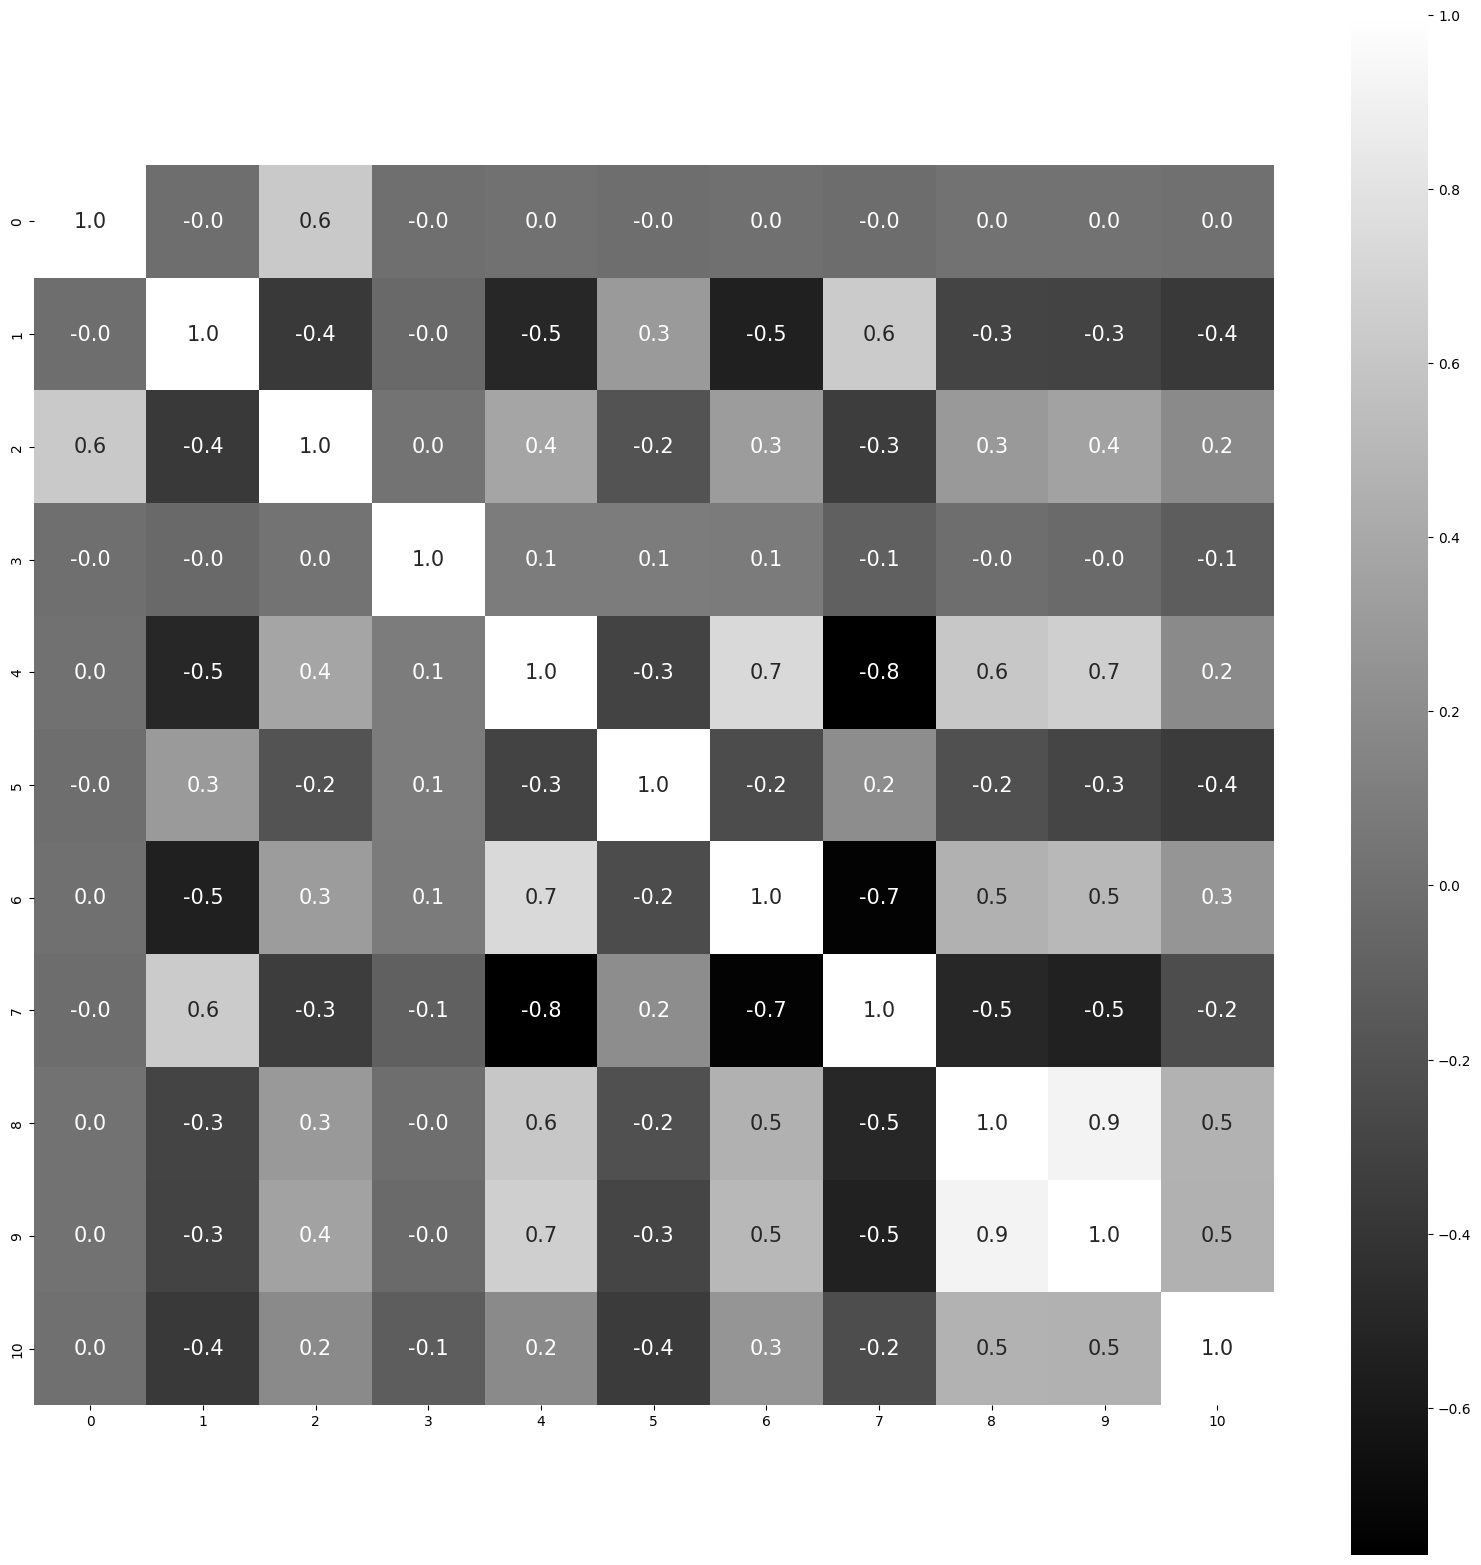

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [107]:
X = data
y = target

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [111]:
lm.intercept_

1.4210854715202004e-14

In [112]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,0.0,7.629813e-18
1,1.0,-5.941428e-17
2,2.0,-1.810618e-16
3,3.0,4.605015e-16
4,4.0,-3.410412e-15
5,5.0,1.242526e-15
6,6.0,-3.672735e-18
7,7.0,8.975076e-17
8,8.0,-8.273352e-17
9,9.0,-4.878910e-17


In [113]:
y_pred = lm.predict(X_train)

In [114]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 4.9803224946461825e-15
MSE: 5.223863655421175e-29
RMSE: 7.227630078678056e-15


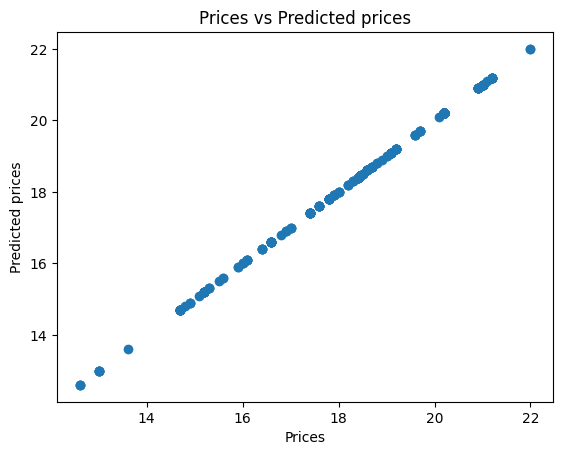

In [115]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

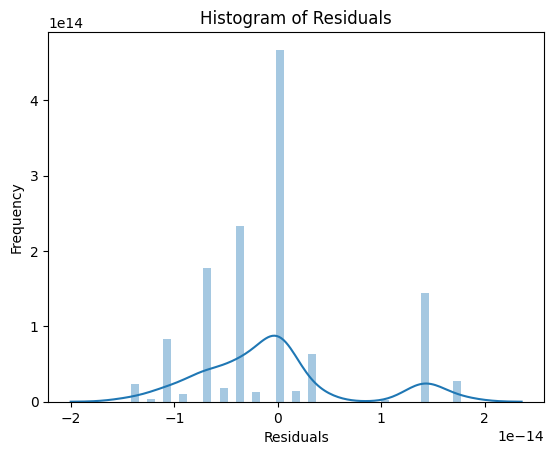

In [116]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [117]:
y_test_pred = lm.predict(X_test)

In [118]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 4.8908245874276635e-15
MSE: 5.070507265795583e-29
RMSE: 7.12074944496405e-15


In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =11))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [124]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0272
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0214
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 12/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 13/100
23/23 [=================

In [125]:
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 4ms/step


In [126]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9869933629696273


In [127]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

0.18466415264257602
